## DSC550
#### Week12 Term Project Final , Author Xin Tang 5/30/24

###### This is a combined layout of the project code, it include 3 main steps:
1. data selection and EDA
2. Data Preparation
3. Model building and evaluation

#### 1. Data selection and EDA
I am interested to know which factor may impact income most and how much the impacts are. This is also a topic impact anyone who has a job and want to make a decent living by earning income.

After few rounds of search, I picked a dataset from kaggle, which is with income information and suitable for data mining/machine learning.

This dataset originates from the 1994 Census Bureau database with information of adult (human being aged >16) income. The income is categorized into 2 gourps ( >50K or <50K ). it also contains 11 independent variables like age, workclass, education and martial status etc. The only variable need to explain is fnlwgt: Final weight. This is an estimation of the number of people each observation in the dataset represents in the population.

The first step is to select and load data, then preform EDA to visualized the data and understand basic relationship/correlation of the variables.

###### Data checking and cleaning 

In [1]:
# Load packages first
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the data and validate success
df = pd.read_csv('adult income.csv')
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K


In [2]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31947 non-null  int64 
 1   workclass       31947 non-null  object
 2   fnlwgt          31947 non-null  int64 
 3   education       31947 non-null  object
 4   education.num   31947 non-null  int64 
 5   marital.status  31947 non-null  object
 6   occupation      31947 non-null  object
 7   relationship    31947 non-null  object
 8   race            31947 non-null  object
 9   sex             31947 non-null  object
 10  native.country  31947 non-null  object
 11  income          31947 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.9+ MB


In [2]:
# exam column and NA
print('variables with NA values', df.isna().sum())

variables with NA values age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64


In [3]:
# check if income is balanced.
count=len(df[df['income']=="<=50K"])
count1=len(df[df['income']==">50K"])
print('high/low income sample ratio is:', round(count1/count,2))

high/low income sample ratio is: 0.32


In [5]:
# the income sample is not balanced.

In [4]:
# Rename column name with dot
df.rename(columns = {'education.num':'education_len'}, inplace = True) 
df.rename(columns = {'marital.status':'marital_status'}, inplace = True) 
df.tail()

,age,workclass,fnlwgt,education,education_len,marital_status,occupation,relationship,race,sex,native.country,income
31942,90,?,175444,7th-8th,4,Separated,?,Not-in-family,White,Female,United-States,<=50K
31943,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
31944,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
31945,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,United-States,>50K
31946,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


###### start the visualization

Text(0, 0.5, 'final weight')

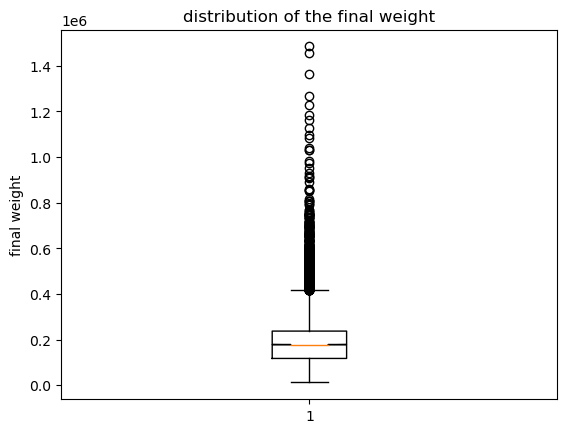

In [5]:
# box chart of fnlwight (final weight)
plt.boxplot(df.fnlwgt, notch=True)
plt.title('distribution of the final weight')
plt.ylabel('final weight')

In [9]:
# looks like most observation are within 10-30% of the population.

Text(0.5, 1.0, 'Race distribution')

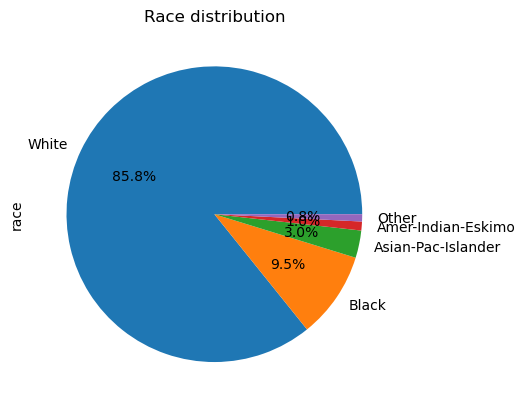

In [6]:
# using pie chart to show distribution of the race
data =df.race.value_counts()

data.plot(kind='pie', autopct='%0.1f%%')
plt.title('Race distribution')

from the pie chart, it is clear that the sampling among races are imbalanced. however per census, 73.6% of us population are white in 1995, so it may reflect the true race distibution of poplulation, not due to a imbalanced sampling.

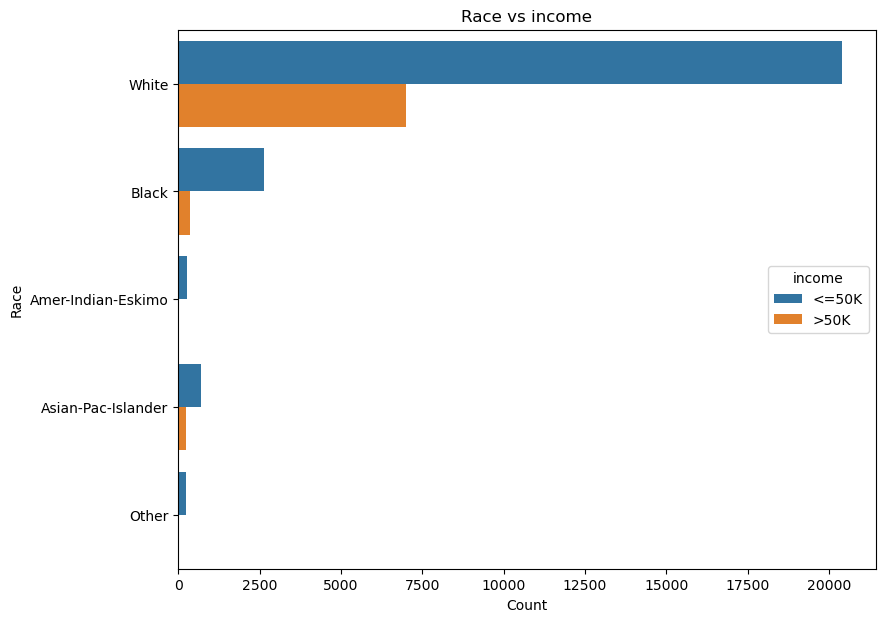

In [11]:
# check income based on race (this is new from original milestone 1 submission)
# distribution chart between marital status vs income
plt.figure(figsize=(9,7))
ax = sns.countplot(data=df, y='race', hue='income')

plt.xlabel('Count')
plt.ylabel('Race')
plt.title('Race vs income')

# Add legend
plt.legend
sns.move_legend(ax, "center right")

# Show the plot
plt.show()

looks like most data is based on white race, the data from race are limited, the impact of race on income may not have enough data to show

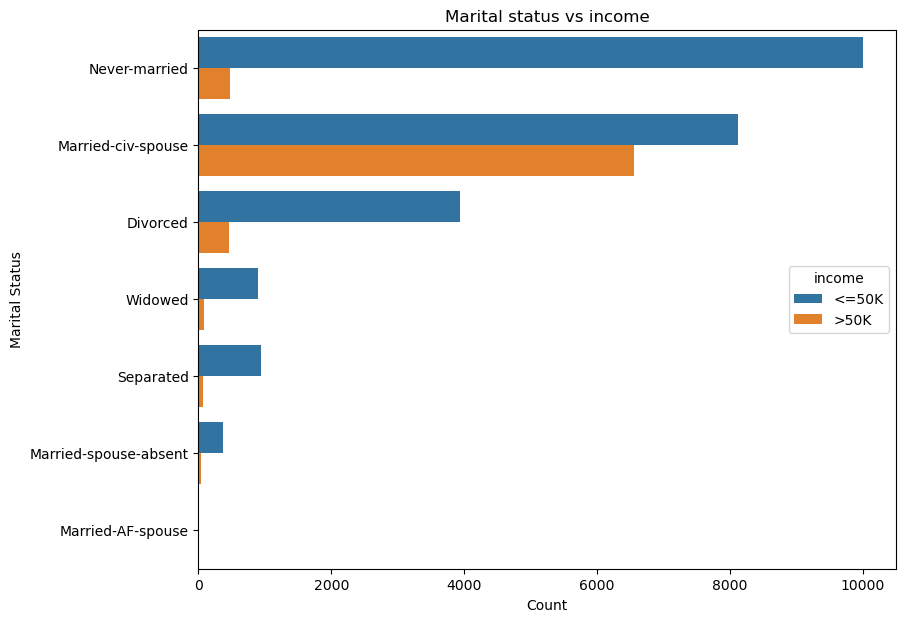

In [18]:
# now check relationship between marital status and income
plt.figure(figsize=(9,7))
ax = sns.countplot(data=df, y='marital_status', hue='income')

plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.title('Marital status vs income')

# Add legend
plt.legend
sns.move_legend(ax, "center right")

# Show the plot
plt.show()

###### From the 2 charts above, looks like there are more data samples on white race, and white earns higher income than any other races. Among the white, the married couple have most chance to have high income (> 50K dollars)

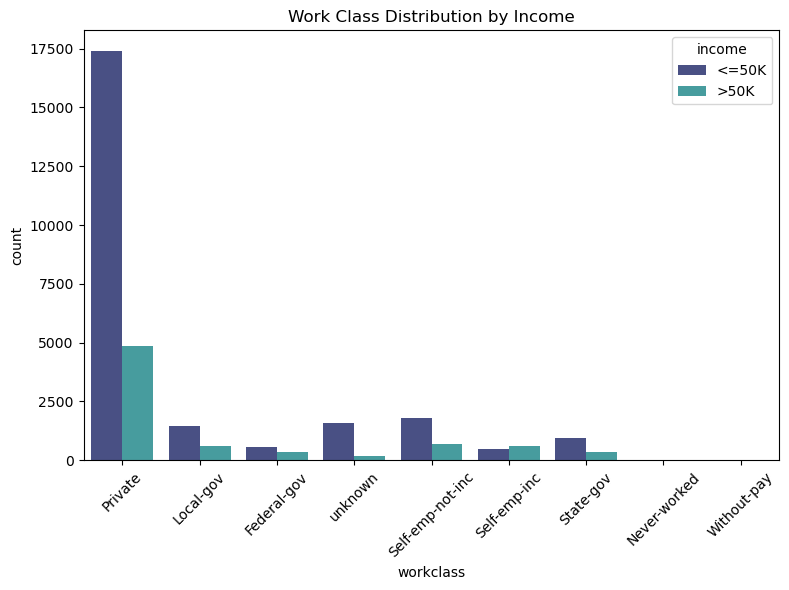

In [19]:
# plot work class distribution by income
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "workclass", hue = "income", palette = "mako")
plt.xticks(rotation = 45)
plt.title("Work Class Distribution by Income")
plt.tight_layout();

###### From the chart above, private business owner are most likely earn >50K.

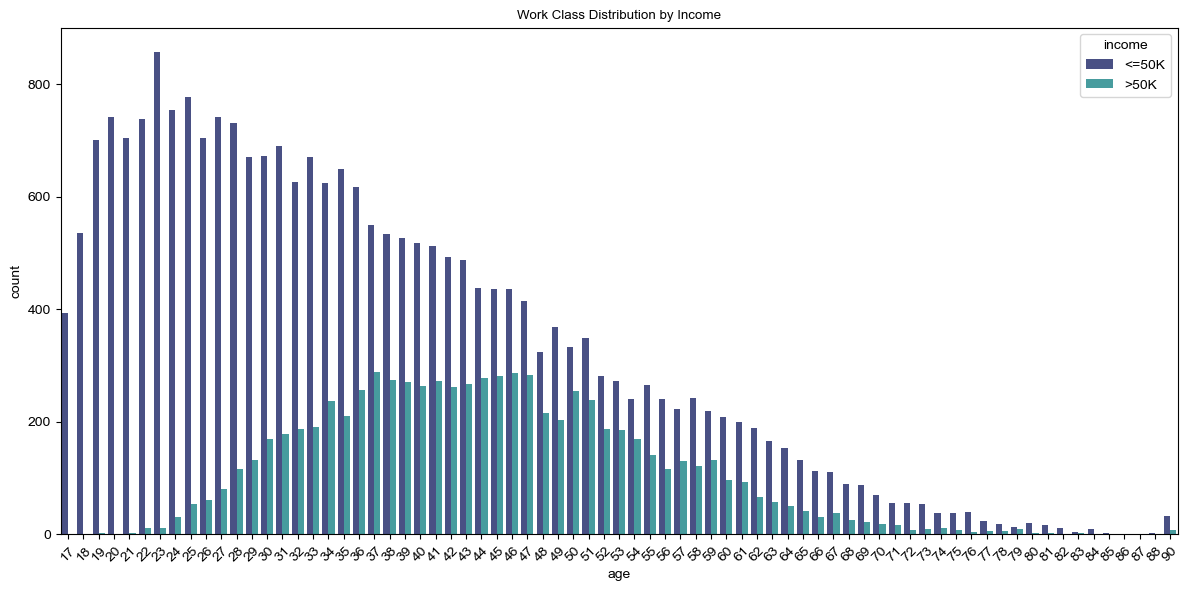

In [20]:
# plot age distribution by income
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = "age", hue = "income", palette = "mako")
plt.xticks(rotation = 45)
sns. set(font_scale= 0.8)
plt.title("Work Class Distribution by Income")
plt.tight_layout();

###### from the chart above, high income often show in middle age (age between 30 to 50), also the high income are likely normally distributed based on age, while low income are skewed based on age. 

###### Summary of EDA:
the data has both categorical and numerical variables. so may need some technical skill (like dummy or label) to turn everything into numerical for better anaylysis
data has enough variations and variable coverage for model building.
Race, marital status, age and workclass have significant impact to income, Correlation analysis could be a necessary step to identify which factors are important and if any factors are correlated.
Data is quite clean and ready for model building.
This data analysis round could be iternerated, more data distribution and correlation analysis maybe needed during variable selection stage.

#### 2. Data preparation

In [22]:
df.head(20)

,age,workclass,fnlwgt,education,education_len,marital_status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K
5,17,Private,225106,10th,6,Never-married,occupation,Own-child,White,Female,United-States,<=50K
6,17,Local-gov,170916,10th,6,Never-married,occupation,Own-child,White,Female,United-States,<=50K
7,17,Federal-gov,99893,11th,7,Never-married,occupation,Not-in-family,Black,Female,United-States,<=50K
8,17,Private,218361,10th,6,Never-married,occupation,Own-child,White,Female,United-States,<=50K
9,17,Private,132680,10th,6,Never-married,occupation,Own-child,White,Female,United-States,<=50K


###### Data cleanning

In [7]:
# there are ''?'' in the 'workclass', 'native.country' and 'education' columns. convert them into 'unknown'
df['workclass'].replace('?', 'unknown', inplace=True)
df['occupation'].replace('?', 'unknown', inplace=True)
df['native.country'].replace('?', 'unknown', inplace=True)

In [8]:
# education length will reflect education level. so I want to check how useful the education is and drop education column. 
df['education'].unique()

array(['11th', '12th', '9th', '10th', '5th-6th', 'Some-college',
       'HS-grad', '7th-8th', 'Masters', 'Bachelors', 'Assoc-voc',
       'Assoc-acdm', 'Preschool', '1st-4th', 'Doctorate', 'Prof-school'],
      dtype=object)

In [9]:
# the 'education length' and 'education' are about the same information, so drop 'deucation' column.
df.drop('education', axis=1, inplace=True)
df.head()

,age,workclass,fnlwgt,education_len,marital_status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K


In [10]:
# The data have mixed categorical and numerical data
# now Split our data set into categorical and numerical for data analysis
# from above analysis, the age, fnlwgt and education_len are numerical columns
# the rest columns (workclass, martial_status, income etc.) are categorical
num=df.select_dtypes(include=np.number)
cat=df.select_dtypes(exclude=np.number)

In [28]:
#check correlation between numerical features and see if any are closely related and can be dropped.
corr = num.corr()
print(corr)

                    age    fnlwgt  education_len
age            1.000000 -0.076178       0.035951
fnlwgt        -0.076178  1.000000      -0.044539
education_len  0.035951 -0.044539       1.000000


###### the numerical columns are not closely related.

In [11]:
# the fnlwgt is a representation of population count, assume it was not quite related to income. so drop it
df.drop('fnlwgt', axis=1, inplace=True)

In [12]:
# income column and sex are actually binary category, so need to converted to 0 and 1 for future modeling.
def compute_income(x):
  if x=="<=50K":
    return 0
  elif(x=='>50K'):
    return 1

df['income']=df['income'].apply(compute_income)

df['sex']=df['sex'].apply(lambda x : 0 if x=='Male' else 1)

df.head()

,age,workclass,education_len,marital_status,occupation,relationship,race,sex,native.country,income
0,17,Private,7,Never-married,occupation,Own-child,White,0,United-States,0
1,17,Private,8,Never-married,occupation,Own-child,White,1,United-States,0
2,17,Private,5,Never-married,occupation,Own-child,White,0,United-States,0
3,17,Private,7,Never-married,occupation,Own-child,White,0,United-States,0
4,17,Private,7,Never-married,occupation,Own-child,White,1,United-States,0


In [13]:
# also notice the occupation has a lot of response as occupation, which is same as no answer, so convert it as unknown.
df['occupation'].replace('occupation', 'unknown', inplace=True)
df.head()

,age,workclass,education_len,marital_status,occupation,relationship,race,sex,native.country,income
0,17,Private,7,Never-married,unknown,Own-child,White,0,United-States,0
1,17,Private,8,Never-married,unknown,Own-child,White,1,United-States,0
2,17,Private,5,Never-married,unknown,Own-child,White,0,United-States,0
3,17,Private,7,Never-married,unknown,Own-child,White,0,United-States,0
4,17,Private,7,Never-married,unknown,Own-child,White,1,United-States,0


###### Handling the missing values

In [14]:
# now we know that workclass, occupation has unknown. so check how many are them
work_unknown = df['workclass'].value_counts()['unknown']
occupation_unknown = df['occupation'].value_counts()['unknown']
print('Ratio of unknown in workclass is', round(work_unknown/len(df['workclass']),2))
print('Ratio of unknown in occupation is', round(occupation_unknown/len(df['occupation']),2))

Ratio of unknown in workclass is 0.06
Ratio of unknown in occupation is 0.1


In [15]:
# The ratio of unknown is small so I plan to remove them

df_clean =df[(df.occupation != 'unknown') & (df.workclass != 'unknown')]
df_clean

,age,workclass,education_len,marital_status,occupation,relationship,race,sex,native.country,income
11,17,Private,7,Never-married,Handlers-cleaners,Own-child,White,0,United-States,0
12,17,Private,5,Never-married,Other-service,Own-child,White,0,United-States,0
14,17,Private,7,Never-married,Adm-clerical,Own-child,White,1,United-States,0
15,17,Private,6,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,1,United-States,0
16,17,Private,7,Never-married,Sales,Own-child,White,1,India,0
...,...,...,...,...,...,...,...,...,...,...
31939,90,Private,14,Married-civ-spouse,Prof-specialty,Wife,White,1,United-States,1
31940,90,Private,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,0,United-States,0
31943,90,Federal-gov,9,Married-civ-spouse,Craft-repair,Husband,White,0,United-States,0
31944,90,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,United-States,0


###### Convert categorical into numerical
Currently the dataframe have mix of numerical and categorical columns, which is hard to use any models I am familar with. I have converted income/sex from binary categories into numerical, I can continue convert rest so I can use prediction model for numerical variables.

In [16]:
categorical_cols = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'native.country']
newdf = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)
newdf

,age,education_len,sex,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
11,17,7,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,17,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,17,7,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15,17,6,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16,17,7,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31939,90,14,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31940,90,13,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31943,90,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31944,90,9,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


now I have a lot of more columns. all slection choices from each category variables turns into a columns.

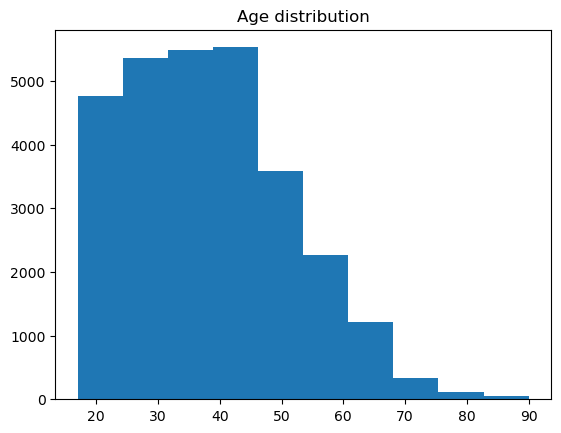

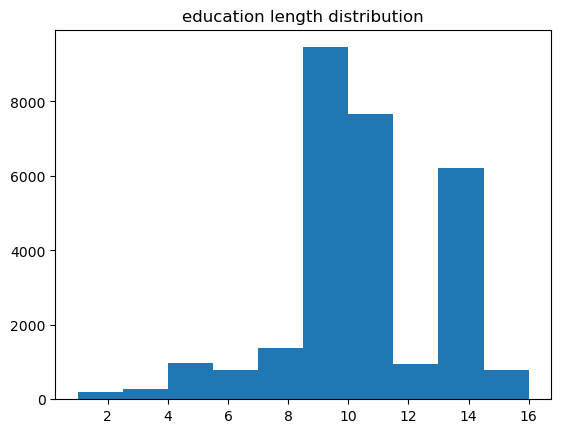

In [17]:
# now I check distribution of age and education_len to see if they are normal distributed, 
#so I can decide if I need to standarlize them

plt.hist(newdf.age)
plt.title('Age distribution')
plt.show()

plt.hist(newdf.education_len)
plt.title('education length distribution')
plt.show()

I think the distribution is compact enough so I do not need to standardlize them

###### 3. Building model

###### Model selection
from last few weeks exercises, I used linear regression model, Polynominal model and Randomforest model for numerical variable prediction. At later weeks, I used support vector Machine model and logical regression for categorical variable predication.

Personally I like random forest since it is a linear regression model but have advantage of overfitting avoid.

I will try random forest regressor first (native one and one with hyperparameter tuning), then I will try  Random ForestClassifier model as well

In [18]:
# now define the independent features and dependent feature (which is income level)
# load modelling related package
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

X = newdf.drop(columns=['income'])
y = newdf.income

#now split it into train and test dataset, 20% are testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Model 1. RandomForest Regressor (native one)

In [19]:
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(random_state=42)

rf = RandomForestRegressor(n_estimators=300, max_depth=5, random_state=0)
rf.fit(X_train , y_train)
pred = rf.predict(X_test)
pred[4030:4040]

array([0.80619507, 0.04137852, 0.04101039, 0.25425958, 0.44838864,
       0.25375449, 0.80550804, 0.01865008, 0.78491931, 0.68162096])

In [20]:
# Since the linear regression will return number, so need to convert it to only 0 and 1. use 0.5 as creteria to classify 
# >=0.5 will be classified as 1 and <0.5 will be classified as 0
predict =[]
for item in pred:
    if item >= 0.5:
        predict.append(1)
    else:
        predict.append(0)

In [21]:
from sklearn.metrics import accuracy_score
print('accuracy of native random forest prediction is:',round(accuracy_score(y_test, predict),4))

accuracy of native random forest prediction is: 0.8254


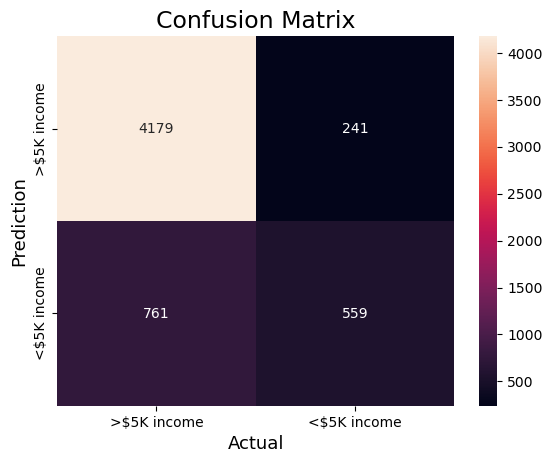

In [22]:
# Create a confusion matrix for the test set predictions.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

#visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['>$5K income','<$5K income'],
            yticklabels=['>$5K income','<$5K income'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [23]:
# Get the precision, recall, and F1-score for the test set predictions.
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      4420
           1       0.70      0.42      0.53      1320

    accuracy                           0.83      5740
   macro avg       0.77      0.68      0.71      5740
weighted avg       0.81      0.83      0.81      5740



In [25]:
#Calculate the R2, RSME and MAE for this model
import sklearn.metrics as metrics
r2_1 = metrics.r2_score(y_test, predict)
mae_1 = metrics.mean_absolute_error(y_test, predict)
mse_1 = metrics.mean_squared_error(y_test, predict)
rmse_1 = np.sqrt(mse_1)

print('R2 value for RF simple is:', r2_1)
print('RSME value for RF simple is:', rmse_1)
print('MAE value for RF simple is:', mae_1)

R2 value for RF simple is: 0.01421225832990547
RSME value for RF simple is: 0.4178091190128736
MAE value for RF simple is: 0.17456445993031358


###### Model 2. RandomForest Regressor (with hyper parameter optimizer)

In [26]:
model2 = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

In [27]:
# use hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
grid_search_rf = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [28]:
# find out best estimator
best_RF_model = grid_search_rf.best_estimator_
y_pred_rf=best_RF_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)

In [29]:
print("random forest regression with hyperparameter tuning Accuracy:", round(accuracy,4))

random forest regression with hyperparameter tuning Accuracy: 0.835


###### model 2 is very computer resource consuming but improved the accuracy by 0.01

In [31]:
#Calculate the R2, RSME and MAE for second model
import sklearn.metrics as metrics
r2_2 = metrics.r2_score(y_test, y_pred_rf)
mae_2 = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_2 = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_2 = np.sqrt(mse_1)

print('R2 value for RF simple is:', r2_2)
print('RSME value for RF simple is:', rmse_2)
print('MAE value for RF simple is:', mae_2)

R2 value for RF simple is: 0.06832236391059932
RSME value for RF simple is: 0.4178091190128736
MAE value for RF simple is: 0.16498257839721253


In [32]:
# Get the precision, recall, and F1-score for the test set predictions.
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4420
           1       0.74      0.44      0.55      1320

    accuracy                           0.84      5740
   macro avg       0.79      0.70      0.72      5740
weighted avg       0.82      0.84      0.82      5740



###### the 2 models are comparable in term of accruacy and other performance indicators. 

###### Classifier: RandomForestClassifier model

In [53]:
# data prediction using classifier

from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier(random_state=42)
cf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# make prediction
cf_y_pred = cf.predict(X_test)

In [55]:
print(f'Accuracy of classifier is:', round(accuracy_score(y_test, cf_y_pred), 4))

Accuracy of classifier is: 0.8061


In [56]:
# Calculate feature importance
feature_importances = cf.feature_importances_

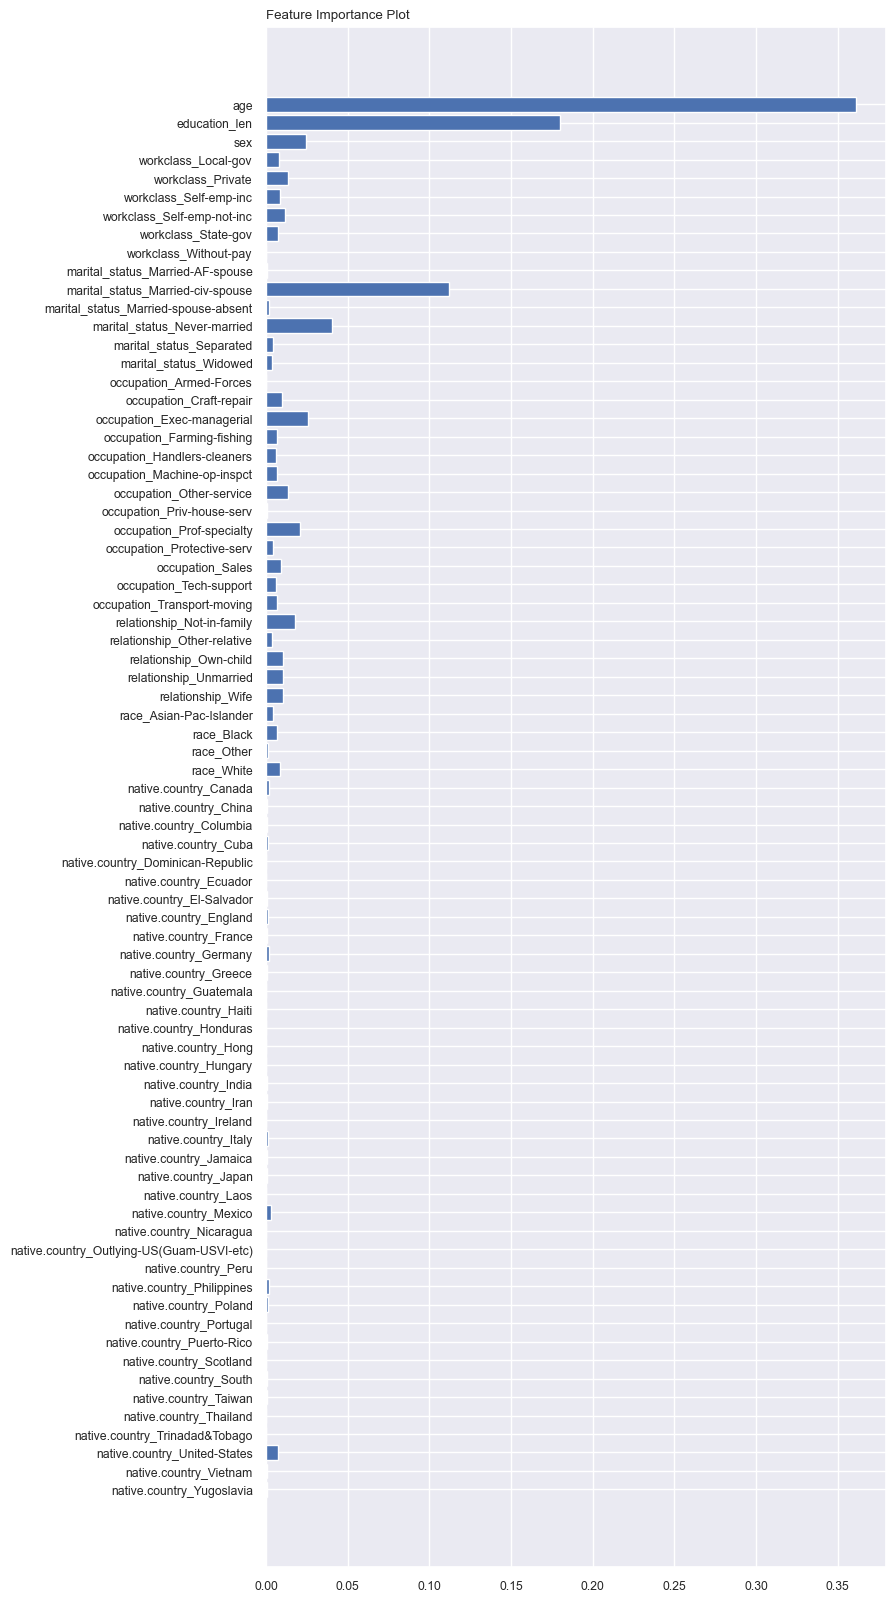

In [58]:
# try plot again
fig, ax = plt.subplots(figsize =(8, 20))

ax.barh(X_train.columns, feature_importances )

ax.invert_yaxis()

ax.set_title('Feature Importance Plot',loc ='left', )

plt.show()

###### looks like age and education length are the 2 most important factors. married with spouse living together can improve the income level as well. occupation matters a little. Native country may not have enough data to tell the difference.  

###### The classifier gives a visualization of the important factors and also the strength of each factor. 

###### End words: this book is to record coding only, please refer to the summary report in word for project report out. 